In [1]:
import os
from typing import List, Tuple, Union
from dataclasses import dataclass
import numpy as np
from scipy.interpolate import PPoly

In [2]:
import os
os.system("gcc --version")

gcc (Homebrew GCC 11.2.0_3) 11.2.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



0

In [3]:
import pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x11ffd8640>)

In [2]:
import sys
sys.path
print(sys.version)

3.10.0 (default, Jan 27 2022, 14:29:58) [Clang 13.0.0 (clang-1300.0.29.30)]


In [3]:
import _lsss

In [4]:
from util import beta_from_V, alpha_beta, ls_hap, ls_dip

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 5]

In [4]:
import msprime as msp

In [9]:
import random

In [191]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-white')
import seaborn as sns
sns.despine()

<Figure size 432x288 with 0 Axes>

Haploid Haplotype Imputation(uniformly random k)

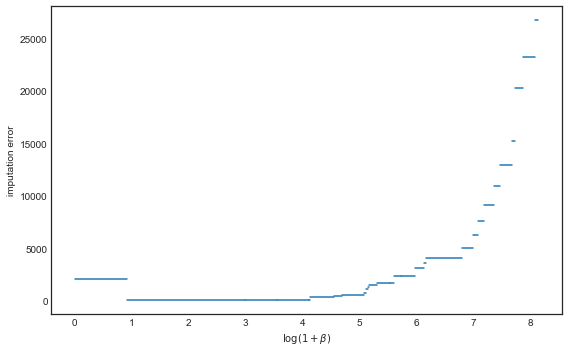

In [101]:
with open('results_alg1_updated/beta_y.pkl', 'rb') as f:
        results = pickle.load(f)
beta, y = results
for i in np.arange(np.size(beta)-1):
    x = np.linspace(beta[i],beta[i+1],10)
    ys = y[i]*np.ones(np.size(x))
    plt.plot(np.log1p(x), ys, color = 'C0')
plt.plot(np.log1p(beta[-1]), y[-1], color='C0')
plt.xlabel(r'$\log(1+\beta)$')
plt.ylabel('imputation error')
plt.tight_layout()
plt.savefig('alg1_error.pdf')

In [455]:
beta[y.argmin()]

1.5

In [1008]:
np.unique(opt_imputed_beta).shape

(21,)

seq = 1e8, panel=1e3, MAF>0.2

In [5]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(500):
    with open('results_alg1_updated/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])
    data.append(word[1])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

In [6]:
def rand_jitter(arr, seed):
    stdev = .03 * (max(arr) - min(arr))
    np.random.seed(seed)
    return arr + np.random.randn(len(arr)) * stdev

/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_25562/40744703.py:42: RuntimeWarning: invalid value encountered in log1p
  w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_25562/40744703.py:44: RuntimeWarning: invalid value encountered in log1p
  plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


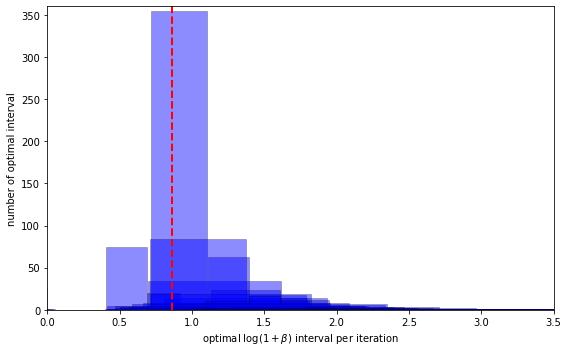

In [8]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(500):
    with open('results_alg1_updated/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])
    data.append(word[1])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)
            
rho = 4e-4
theta = 4e-4
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 3.5])
plt.ylim([0, 360])
plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('hist_alg1.pdf')

In [9]:
rate = sum([int(word[0]<=true_beta<=word[1]) for word in interval])/1000
rate

0.57

In [420]:
# number of beta in the interval
true_beta = 1.3669609157628595
rate = sum([int(word[0]<=true_beta<=word[1]) for word in interval])/1000
rate

0.57

Stdpopsim Simulation

In [22]:
import stdpopsim

In [67]:
num_iter = 1000
opt_imputed_beta_std = np.zeros(num_iter)
panel = list(range(1, 50))
species = stdpopsim.get_species("HomSap")
contig = species.get_contig('chr22', length_multiplier=0.2)
model = species.get_demographic_model('Africa_1T12')
samples = model.get_samples(55)
engine = stdpopsim.get_engine("msprime")
start = time.time()
for i in np.arange(num_iter):
    ts = engine.simulate(model, contig, samples, seed=i+1)

    beta, y = imputation_accuracy(ts, 0, panel, 350).T
    opt_imputed_beta_std[i] = beta[y.argmin()]
end = time.time()

In [68]:
print(end - start)

1657.894569158554


In [41]:
# Compute Ne with watterson
species = stdpopsim.get_species("HomSap")
contig = species.get_contig('chr22', length_multiplier=0.2)
model = species.get_demographic_model('Africa_1T12')
samples = model.get_samples(1000)
engine = stdpopsim.get_engine("msprime")

In [42]:
#watterson
segregating_sites = []
for _ in np.arange(50):
    ts = engine.simulate(model, contig, samples, seed=_+1)
    segregating_sites.append(ts.segregating_sites(span_normalise=True))
harmonic = (1/np.arange(1, 1000)).sum()
Ne=np.mean(segregating_sites)/(harmonic*4*contig.mutation_rate)

In [43]:
Ne

16041.458728720134

In [408]:
panel = list(range(1, 1001))
species = stdpopsim.get_species("HomSap")
contig = species.get_contig('chr2', length_multiplier=0.413)
model = species.get_demographic_model('Africa_1T12')
samples = model.get_samples(1000)
engine = stdpopsim.get_engine("msprime")

In [397]:
contig = species.get_contig('chr2', length_multiplier=0.413)
print(contig.length/1e7)

10.0025927


In [722]:
species = stdpopsim.get_species("HomSap")
model = species.get_demographic_model('Africa_1T12')
model.get_demography_debugger().print_history()

DemographyDebugger
╠════════════════════════════════╗
║ Epoch[0]: [0, 205) generations ║
╠════════════════════════════════╝
╟    Populations (total=1 active=1)
║    ┌────────────────────────────────────────────┐
║    │       │      start│       end│growth_rate  │
║    ├────────────────────────────────────────────┤
║    │  pop_0│   432124.6│   14474.0│ 0.0166      │
║    └────────────────────────────────────────────┘
╟    Events @ generation 205
║    ┌───────────────────────────────────────────────────────────────────────────────────┐
║    │   time│type        │parameters           │effect                                  │
║    ├───────────────────────────────────────────────────────────────────────────────────┤
║    │  204.6│Population  │population=0,        │initial_size → 1.4e+04 and growth_rate  │
║    │       │parameter   │initial_size=14474,  │→ 0 for population 0                    │
║    │       │change      │growth_rate=0        │                                        │
║    

In [411]:
h = []
samples = model.get_samples(2)
engine = stdpopsim.get_engine("msprime")
for _ in np.arange(100):
    ts = engine.simulate(model, contig, samples, seed=_+1)
    h.append(ts.first().get_tmrca(0, 1))
Ne = np.mean(h)

In [412]:
Ne

17463.325368037087

In [413]:
contig.mutation_rate

1.29e-08

In [417]:
contig.recombination_map.mean_rate

1.1054289277533446e-08

seq = 1e8, panel=1e3, MAF>0.2

In [10]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('results_alg1_std/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

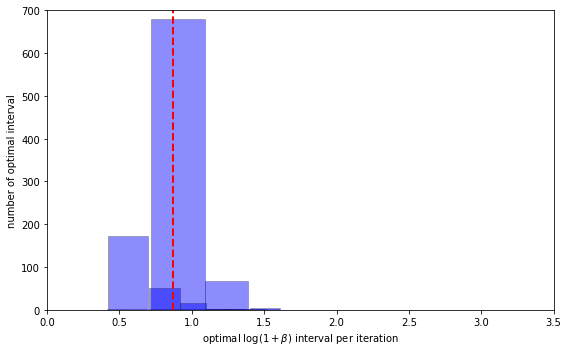

In [11]:
unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

Ne = 17463
rho = 2*1.1054289277533446e-08*Ne
theta = 2*1.29e-08*Ne
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta

plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 3.5])
plt.ylim([0, 700])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('hist_alg1_std.pdf')

In [12]:
rate = sum([int(word[0]<=true_beta<=word[1]) for word in interval])/1000
rate

0.733

In [486]:
# number of beta in the interval
true_beta = 1.37956799394278
rate = sum([int(word[0]<=true_beta<=word[1]) for word in interval])/1000
rate

0.733

Diploid Genotype Phasing

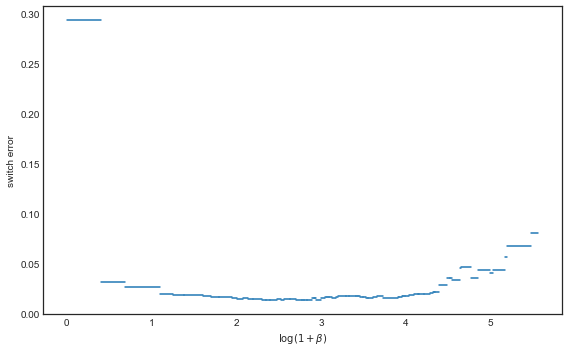

In [102]:
with open('results_std/beta_y.pkl', 'rb') as f:
        results = pickle.load(f)
beta = results[0][0]
y = results[0][1]
for i in np.arange(np.size(beta)-1):
    x = np.linspace(beta[i],beta[i+1],10)
    ys = y[i]*np.ones(np.size(x))
    plt.plot(np.log1p(x), ys, color = 'C0')
plt.plot(np.log1p(beta[-1]), y[-1], color='C0')
plt.xlabel(r'$\log(1+\beta)$')
plt.ylabel('switch error')
plt.tight_layout()
plt.savefig('alg2_error.pdf')

In [103]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    try:
        with open('results/opt_switch_beta%s.pkl' % array, 'rb') as f:
            word = pickle.load(f)
        data.append(word[0])
    except FileNotFoundError:
        continue
        
interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

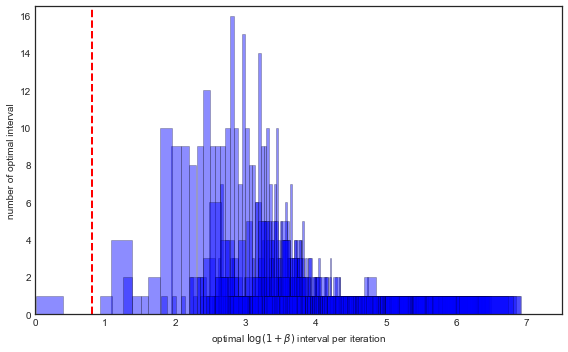

In [105]:
unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)
rho = 4e-4
theta = 4e-4
panel = np.arange(2, 102)
N = np.size(panel)
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta
plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 7.5])
plt.ylim([0, 16.5])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('hist_alg2.pdf')

In [808]:
unique_list[count.argmax()]

array([15., 16.])

In [811]:
true_beta

1.259210738774046

In [809]:
from collections import Counter
ctr = Counter(betas)
value, its_frequency = ctr.most_common(1)[0]
value

23.0

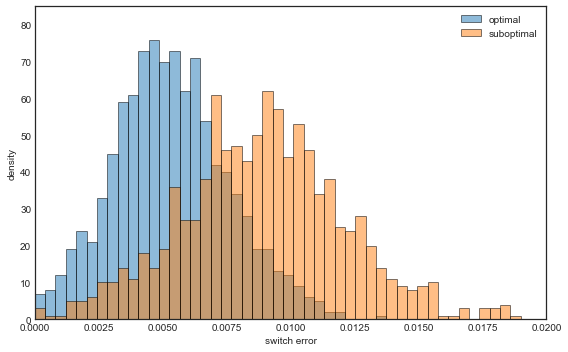

In [53]:
switch_erroro = []
for array in range(20):
    with open('switch_error/switch_error%s.pkl' % array, 'rb') as f:
        switch_erroro.append(pickle.load(f)) 
switch_erroro = list(np.concatenate(switch_erroro).flat)
switch_errort = []
for array in range(20):
    with open('switch_error/switch_errors%s.pkl' % array, 'rb') as f:
        switch_errort.append(pickle.load(f)) 
switch_errort = list(np.concatenate(switch_errort).flat)
#plt.style.use('seaborn-deep')
bins = np.linspace(0, 0.04, 100)

plt.xlim([0, 0.02])
plt.ylim([0, 85])
plt.hist(switch_erroro, bins, alpha=0.5, edgecolor='k', label='optimal')
plt.hist(switch_errort, bins, alpha=0.5, edgecolor='k', label='suboptimal')
#plt.hist([diff_std, diff_stds], bins, label=['optimal', 'suboptimal'])
plt.xlabel(r"switch error")
plt.ylabel(r"density")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('diff1.pdf')

Stdpopsim

In [49]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    try:
        with open('results_std/opt_switch_beta%s.pkl' % array, 'rb') as f:
            word = pickle.load(f)
        data.append(word[0])
    except FileNotFoundError:
        continue
        
interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

In [846]:
# Compute Ne with watterson
species = stdpopsim.get_species("HomSap")
contig = species.get_contig('chr22', length_multiplier=0.2)
model = species.get_demographic_model('Africa_1T12')
samples = model.get_samples(52)
engine = stdpopsim.get_engine("msprime")
ts = engine.simulate(model, contig, samples)

In [218]:
#watterson
segregating_sites = []
for _ in np.arange(500):
    ts = engine.simulate(model, contig, samples, seed=_+1)
    segregating_sites.append(ts.segregating_sites(span_normalise=True))
harmonic = (1/np.arange(1, 52)).sum()
Ne=np.mean(segregating_sites)/(harmonic*4*contig.mutation_rate)

/Users/yifanjin/.pyenv/versions/3.10.0/lib/python3.10/site-packages/stdpopsim/engines.py:120: UserWarning: The demographic model has mutation rate 2.36e-08, but this simulation used the contig's mutation rate 1.29e-08. Diversity levels may be different than expected for this species. For details see documentation at https://popsim-consortium.github.io/stdpopsim-docs/stable/tutorial.html
  warnings.warn(


In [230]:
Ne

10851.467005645269

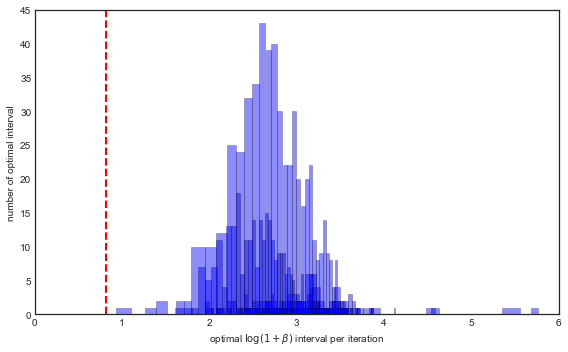

In [50]:
unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)

Ne=16995
rho = 4*1.4445022767788227e-08*Ne
theta = 4*1.29e-08*Ne
panel = np.arange(2, 102)
N = np.size(panel)
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta
plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 6])
plt.ylim([0, 45])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig('hist_alg2_std.pdf')

In [783]:
unique_list[count.argmax()]

array([12.03987637, 12.976899  ])

In [784]:
from collections import Counter
ctr = Counter(betas)
value, its_frequency = ctr.most_common(3)[0]
value

12.0

In [232]:
true_beta

1.213482406218651

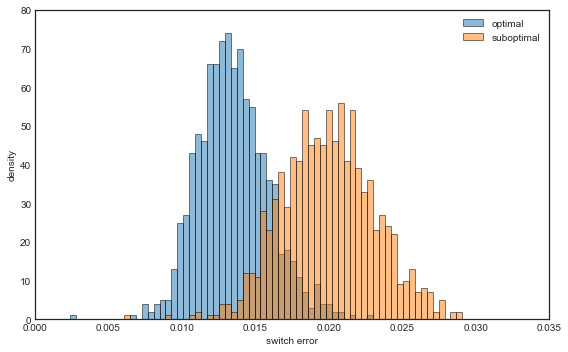

In [54]:
switch_error_stdo = []
for array in range(20):
    with open('switch_error_std/switch_error_std%s.pkl' % array, 'rb') as f:
        switch_error_stdo.append(pickle.load(f)) 
switch_error_stdo = list(np.concatenate(switch_error_stdo).flat)
switch_error_stds = []
for array in range(20):
    with open('switch_error_std1/switch_error_std%s.pkl' % array, 'rb') as f:
        switch_error_stds.append(pickle.load(f)) 
switch_error_stds = list(np.concatenate(switch_error_stds).flat)

#plt.style.use('seaborn-deep')
bins = np.linspace(0, 0.04, 100)

plt.xlim([0, 0.035])
plt.ylim([0, 80])
plt.hist(switch_error_stdo, bins, alpha=0.5, edgecolor='k', label='optimal')
plt.hist(switch_error_stds, bins, alpha=0.5, edgecolor='k', label='suboptimal')
#plt.hist([diff_std, diff_stds], bins, label=['optimal', 'suboptimal'])
plt.xlabel(r"switch error")
plt.ylabel(r"density")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('diff2.pdf')

/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_68209/2347695875.py:41: RuntimeWarning: invalid value encountered in log1p
  w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_68209/2347695875.py:43: RuntimeWarning: invalid value encountered in log1p
  plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


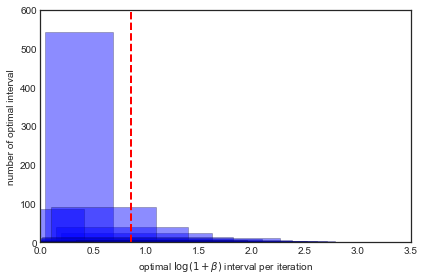

In [150]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('alg1_loss2/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

rho = 4e-4
theta = 4e-4
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 3.5])
plt.ylim([0, 600])
plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('hist_alg1_loss2.pdf')

/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_25562/3323722023.py:47: RuntimeWarning: invalid value encountered in log1p
  w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_25562/3323722023.py:49: RuntimeWarning: invalid value encountered in log1p
  ax1.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


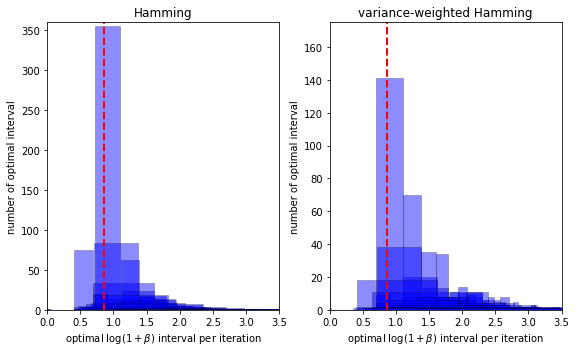

In [18]:
import pickle

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

data = []
betas = []
interval = []
error = []
for array in range(500):
    with open('results_alg1_updated/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])
    data.append(word[1])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)
            
rho = 4e-4
theta = 4e-4
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta

ax1.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
ax1.set_xlim([0, 3.5])
ax1.set_ylim([0, 360])
ax1.set_xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
ax1.set_ylabel(r"number of optimal interval")
ax1.set_title('Hamming')
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    ax1.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('alg1_loss2/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

rho = 4e-4
theta = 4e-4
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta
ax2.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
ax2.set_xlim([0, 3.5])
ax2.set_ylim([0, 175])
ax2.set_xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
ax2.set_ylabel(r"number of optimal interval")
ax2.set_title('variance-weighted Hamming')
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    ax2.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)
    
plt.tight_layout()    
plt.savefig('hist_impute.pdf')

In [14]:
rate = sum([int(word[0]<=true_beta<=word[1]) for word in interval])/1000
rate

0.246

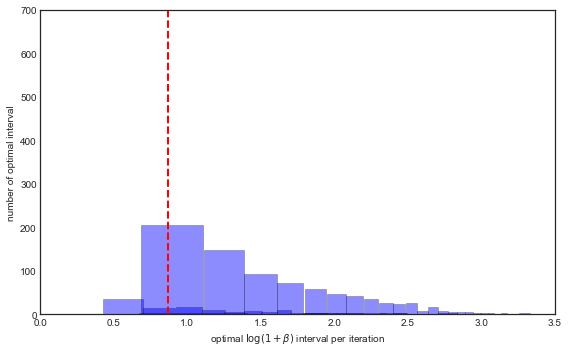

In [217]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('alg1_std_loss2/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

Ne = 17463
rho = 2*1.1054289277533446e-08*Ne
theta = 2*1.29e-08*Ne
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta

plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 3.5])
plt.ylim([0, 700])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('hist_alg1_std_loss2.pdf')

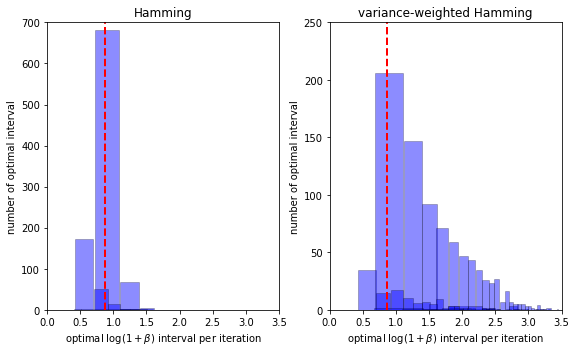

In [17]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('results_alg1_std/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]
unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

Ne = 17463
rho = 2*1.1054289277533446e-08*Ne
theta = 2*1.29e-08*Ne
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta

ax1.set_xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
ax1.set_ylabel(r"number of optimal interval")
ax1.set_title('Hamming')
ax1.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
ax1.set_xlim([0, 3.5])
ax1.set_ylim([0, 700])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    ax1.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('alg1_std_loss2/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

Ne = 17463
rho = 2*1.1054289277533446e-08*Ne
theta = 2*1.29e-08*Ne
N = np.size(range(1, 1001))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta

ax2.set_xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
ax2.set_ylabel(r"number of optimal interval")
ax2.set_title('variance-weighted Hamming')
ax2.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
ax2.set_xlim([0, 3.5])
ax2.set_ylim([0, 250])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    ax2.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('hist_impute_std.pdf')

In [16]:
rate = sum([int(word[0]<=true_beta<=word[1]) for word in interval])/1000
rate

0.223

/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/3528156987.py:44: RuntimeWarning: invalid value encountered in log1p
  w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/3528156987.py:46: RuntimeWarning: invalid value encountered in log1p
  plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


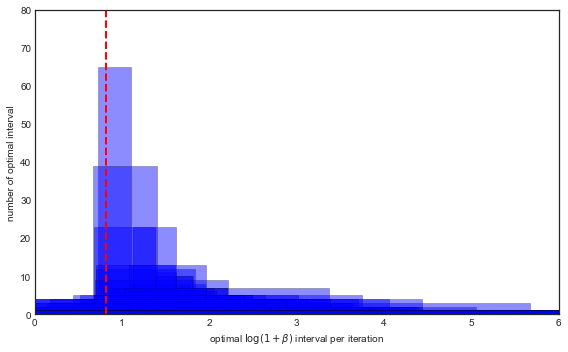

In [232]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    try:
        with open('prephase_loss1/opt_imputed_beta%s.pkl' % array, 'rb') as f:
            word = pickle.load(f)
        data.append(word[0])
    except FileNotFoundError:
        continue

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
# assert(sum(count)==1000)

rho = 4e-4
theta = 4e-4
N = np.size(range(1, 100))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 6])
plt.ylim([0, 80])
plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('prephase_loss1.pdf')

/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/2143574501.py:44: RuntimeWarning: invalid value encountered in log1p
  w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/2143574501.py:46: RuntimeWarning: invalid value encountered in log1p
  plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


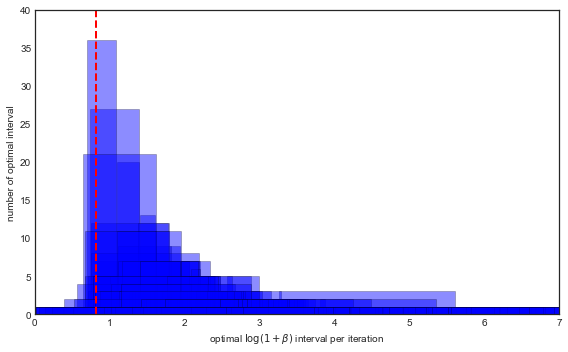

In [218]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    try:
        with open('prephase_loss2/opt_imputed_beta%s.pkl' % array, 'rb') as f:
            word = pickle.load(f)
        data.append(word[0])
    except FileNotFoundError:
        continue

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
# assert(sum(count)==1000)

rho = 4e-4
theta = 4e-4
N = np.size(range(1, 100))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 7])
plt.ylim([0, 40])
plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('prephase_loss2.pdf')

In [219]:
rate = sum([int(word[0]<=true_beta<=word[1]) for word in interval])/1000
rate

0.223

/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/2018566305.py:43: RuntimeWarning: invalid value encountered in log1p
  w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/2018566305.py:45: RuntimeWarning: invalid value encountered in log1p
  plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


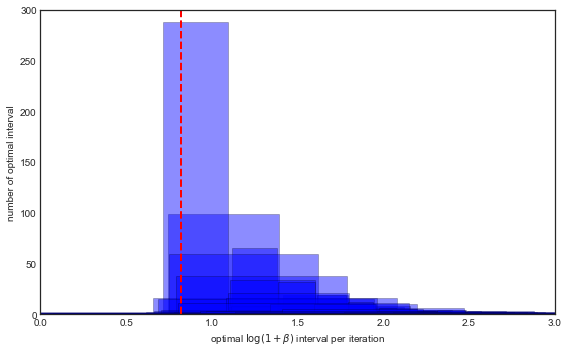

In [240]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('prephase_loss1_std/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

Ne = 17463
rho = 2*1.1054289277533446e-08*Ne
theta = 2*1.29e-08*Ne
N = np.size(range(1, 100))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta

plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 3])
plt.ylim([0, 300])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('prephase_loss1_std.pdf')

/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/3417450145.py:43: RuntimeWarning: invalid value encountered in log1p
  w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
/var/folders/w3/12x3qx1j0d15jv395lym1qs00000gn/T/ipykernel_1582/3417450145.py:45: RuntimeWarning: invalid value encountered in log1p
  plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)


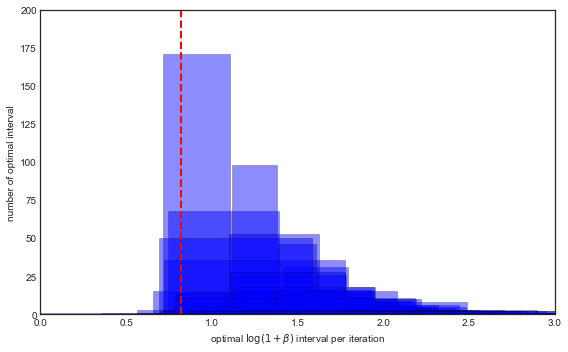

In [222]:
import pickle
data = []
betas = []
interval = []
error = []
for array in range(1000):
    with open('prephase_loss2_std/opt_imputed_beta%s.pkl' % array, 'rb') as f:
        word = pickle.load(f)
    data.append(word[0])

interval = [word[0] for word in data]
betas = [word[0][word[1]] for word in data]
error = [word[2] for word in data]

unique_list = np.array(interval[0]).reshape(1,2)
count = np.array([1])
for i in range(1,np.shape(interval)[0]):

        if 2 in np.sum(unique_list==interval[i], axis=1):
            count[np.where(np.sum(unique_list==interval[i], axis=1)==2)] += 1
        else:
            unique_list = np.vstack((unique_list, interval[i]))
            count = np.append(count, 1)
assert(sum(count)==1000)

Ne = 17463
rho = 2*1.1054289277533446e-08*Ne
theta = 2*1.29e-08*Ne
N = np.size(range(1, 100))
p_theta = (1-np.exp(-theta/N))/3
p_rho = (1-np.exp(-rho/N))/N
alpha_theta = -np.log(p_theta/(1 - 3*p_theta))
beta_rho = -np.log(p_rho/(1 - N*p_rho))
true_beta = beta_rho/alpha_theta

plt.xlabel(r"optimal $\log(1+\beta)$ interval per iteration")
plt.ylabel(r"number of optimal interval")
plt.axvline(x=np.log1p(true_beta), color='r', linestyle='dashed', linewidth=2)
plt.xlim([0, 3])
plt.ylim([0, 200])
for i in range(0, np.shape(unique_list)[0]):
    unique_list[i] = rand_jitter(unique_list[i], i)
    w = np.log1p(unique_list[i][1]) - np.log1p(unique_list[i][0])
    h = count[i]
    plt.bar(x=np.log1p(unique_list[i][0]), height = h, width = w, align = 'edge', color = 'b', edgecolor = 'black',alpha=0.45, linestyle='-', linewidth=0.5)

plt.tight_layout()    
plt.savefig('prephase_loss2_std.pdf')